## Problem Statement
- A Chinese automobile company, Geely Auto, aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

- They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting car pricing in the American market, as they may differ from the Chinese market. 

- The company wants to know the following things:

    - Which variables are significant in predicting the price of a car?
    - How well do those variables describe the price of a car?
    - Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the American market. 

 

### Step 1: Understanding the Data

In [278]:
# Importing all the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#importing the RFE
from sklearn.feature_selection import RFE
#importing the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [279]:
cars=pd.read_csv('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [280]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [281]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Step 2: Cleaning the Data

In [282]:
#dropping the car_ID column as it is not required
cars.drop('car_ID',axis=1,inplace=True)

In [283]:
cars_null=cars.isna().mean().round(4)*100
cars_null.sort_values(ascending=False).head()

symboling     0.0
enginetype    0.0
highwaympg    0.0
citympg       0.0
peakrpm       0.0
dtype: float64

In [284]:
cars.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

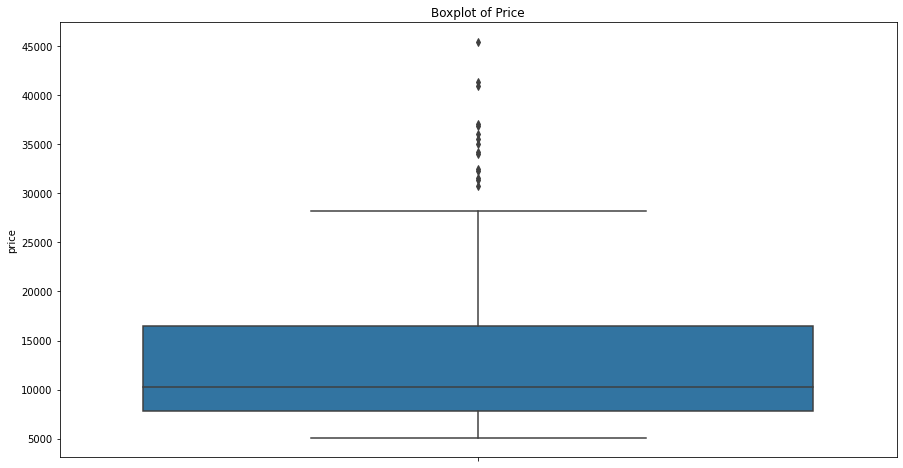

In [285]:
# Outlier Analysis of Target Variable i.e. price

sns.boxplot(y=cars['price'])
plt.title('Boxplot of Price')
plt.show()

There are certain values in price column above 35k which are outliers. We will not remove them rather we'll use standardization to remove the outliers. 

In [286]:
cars['CarName']=cars['CarName'].str.split(' ',expand=True)[0]
cars['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are some spelling mistakes in the CarName column. We will correct them.

- mazda=['mazda','maxda']
- Nissan=['nissan','Nissan']
- porcshce=['porsche','porcshce']
- toyota=['toyota','toyouta']
- volkswagen=['volkswagen','vw','vokswagen']

In [287]:
cars['CarName']=cars['CarName'].replace({'maxda':'mazda','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'})
cars['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [288]:
# The symboling variable is actually a categorical variable as per the data dictionary but is encoded as a numeric variable.

cars.symboling=cars.symboling.astype('object')

In [289]:
#Checking for the duplicate data

cars.loc[cars.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


#### There are no duplicate rows in the data

In [290]:
# Separating the categorical and numerical variables

cat_vars=cars.select_dtypes(include='object').columns
num_vars=cars.select_dtypes(include=['int64','float64']).columns
print(cat_vars.shape)
print(num_vars.shape)

cars_cat=cars[cat_vars]
cars_num=cars[num_vars]

(11,)
(14,)


In [291]:
cars_cat.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [292]:
cars_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


### Step 3: Visualizing the Data

Text(0, 0.5, 'Count of Cars')

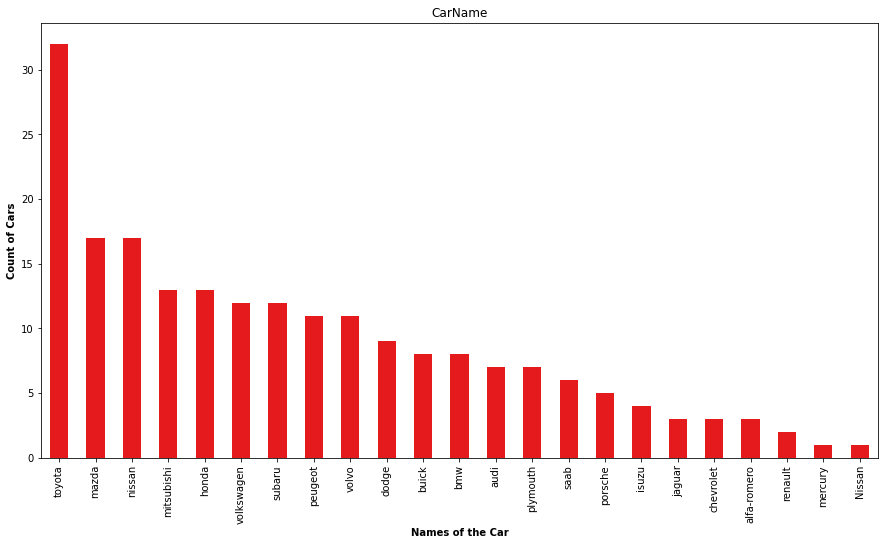

In [293]:
# Visualizing the CarName variable

plt.rcParams['figure.figsize'] = [15,8]
ax=cars['CarName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

- The top 3 car names are toyota, nissan and mazda.
- The least car name is mercury,

In [294]:
print(sns.__version__)
print(pd.__version__)
print(np.__version__)

0.11.1
2.0.1
1.22.4


In [295]:
import matplotlib
print("Matplotlib version:", matplotlib.__version__)


Matplotlib version: 3.7.0


/Users/rohitbele/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


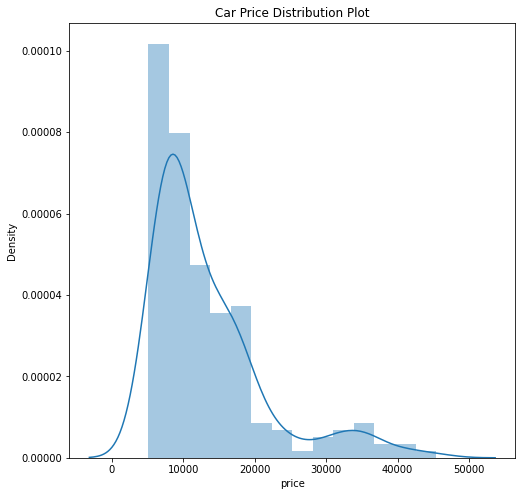

In [296]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(cars['price'])

plt.show()


- The data is right skewed.

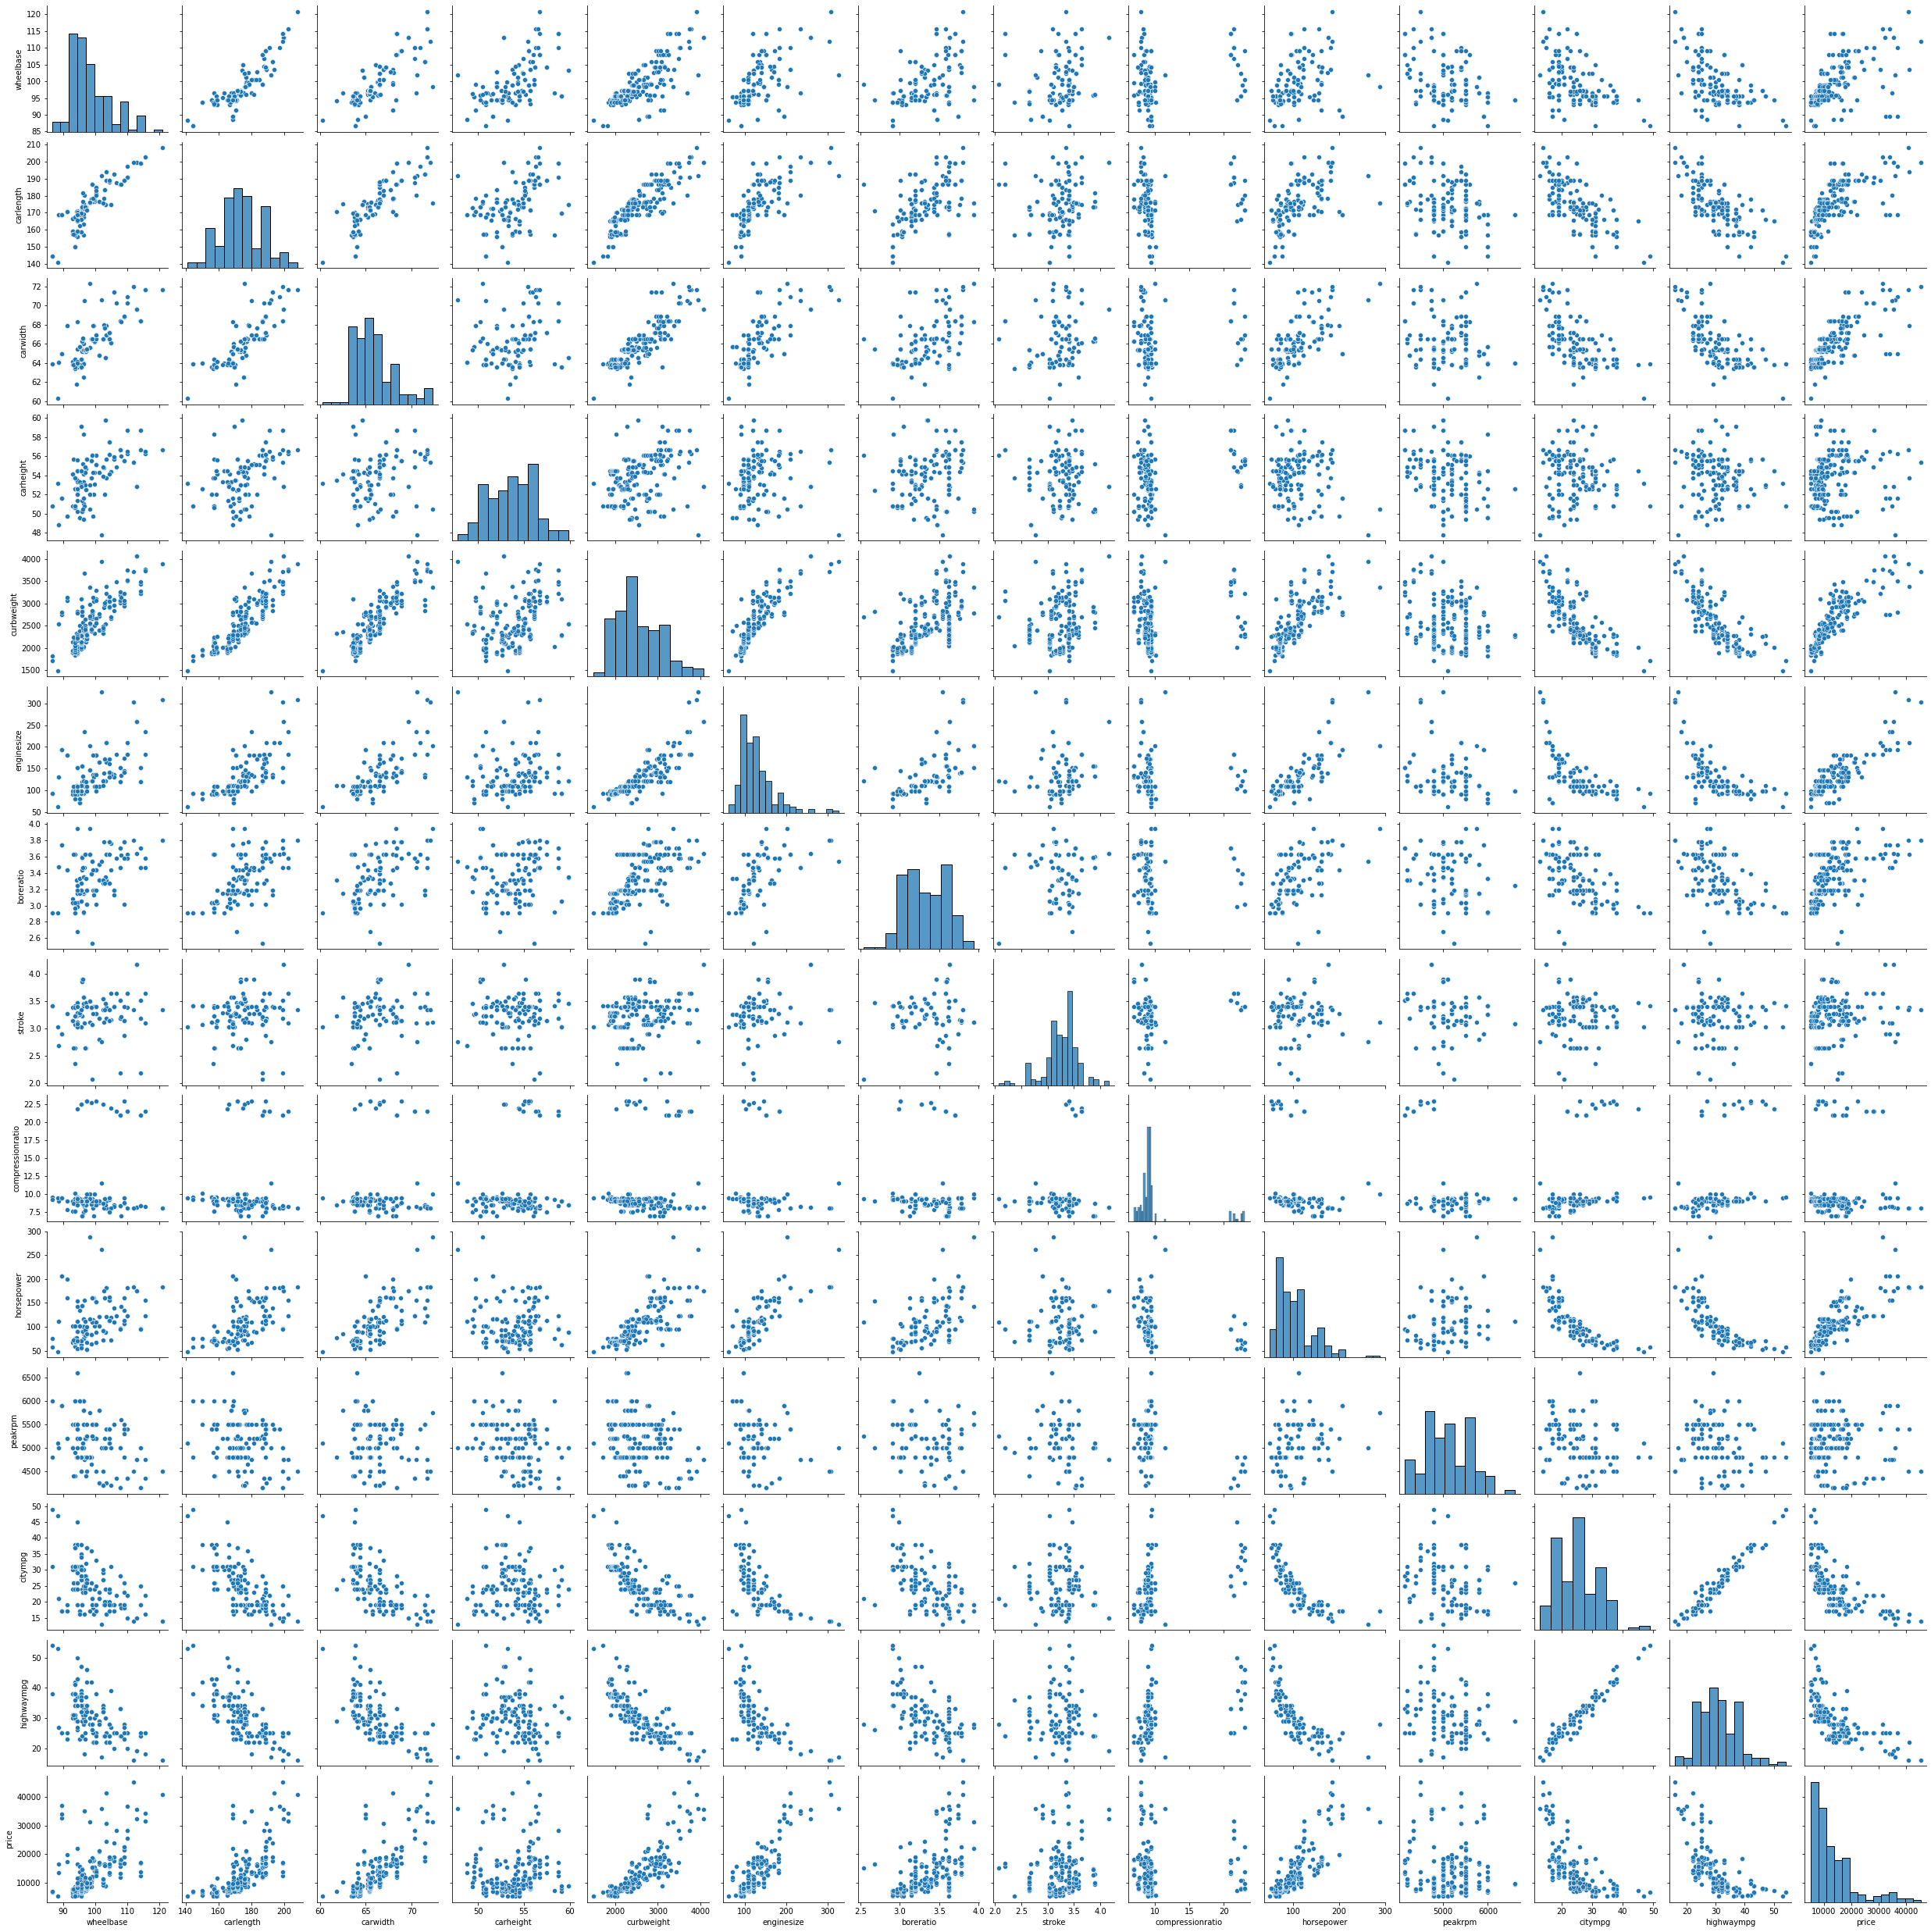

In [297]:
sns.pairplot(cars_num)
plt.show()

- wheelbase, carlength, carwidth, curbweight, enginesize, horsepower are having linear positive relationship with price.
- carheight doesn't have any relationship with price variable
- citympg and highwaympg are having linear negative relationship with price.


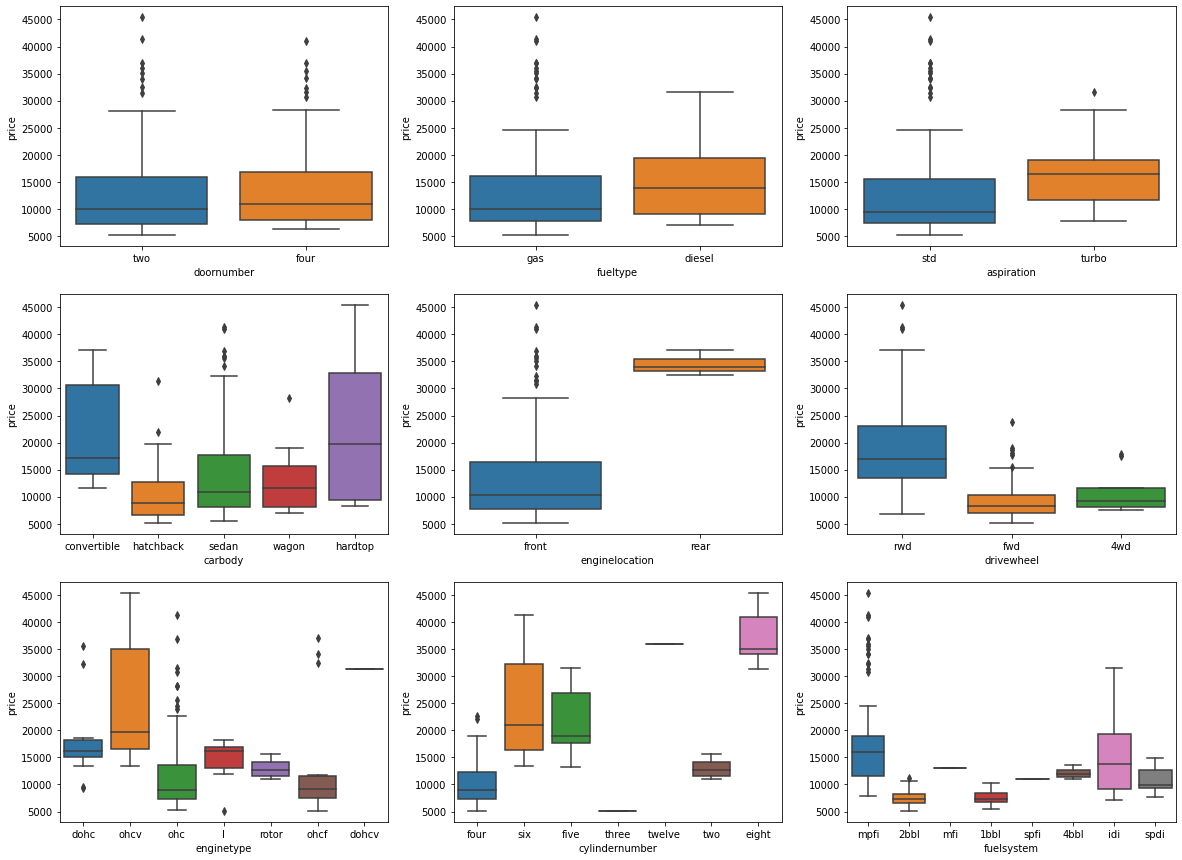

In [298]:
# Visualizing all the categorical variables using boxplot
# boxplot of categorical variables with respect to price

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = cars)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = cars)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = cars)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = cars)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = cars)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars)
plt.show()

#### Insights
- The cars with fueltype as diesel are comparatively expensive than the cars with fueltype as gas.
- All the types of carbody is relatively cheaper as compared to convertible carbody.
- The cars with rear enginelocation are way expensive than cars with front enginelocation.
- The price of car is directly proportional to no. of cylinders in most cases.
- Enginetype ohcv comes into higher price range cars.
- DoorNumber isn't affecting the price much.
- HigerEnd cars seems to have rwd drivewheel

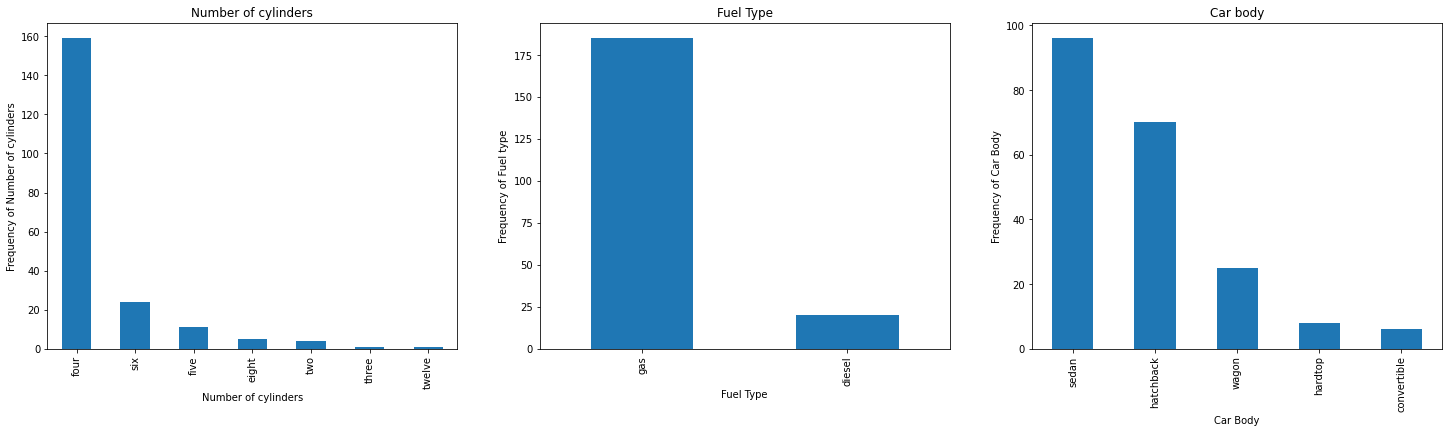

In [299]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars['cylindernumber'].value_counts().plot(kind='bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')

plt.subplot(1,3,2)
plt1 = cars['fueltype'].value_counts().plot(kind='bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')

plt.subplot(1,3,3)
plt1 = cars['carbody'].value_counts().plot(kind='bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')

plt.show()

- Maximum cars have four cylinders.
- Maximum cars use gas fuel.
- Maximum cars are sedans.

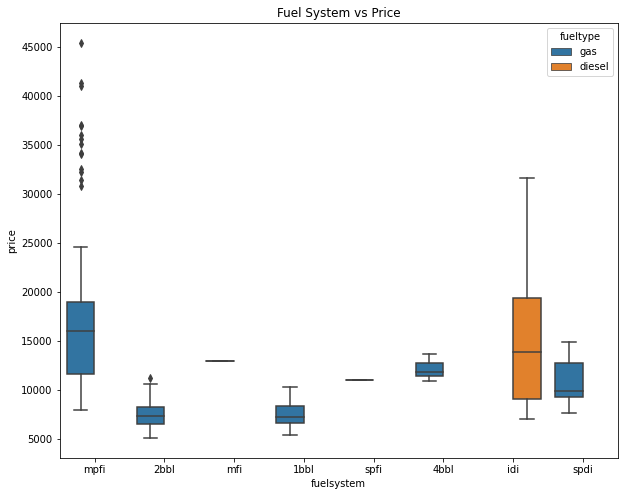

In [300]:
#Relationship between fuelsystem vs price with hue fueltype

plt.figure(figsize=(10, 8))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = cars)
plt.title('Fuel System vs Price')
plt.show()


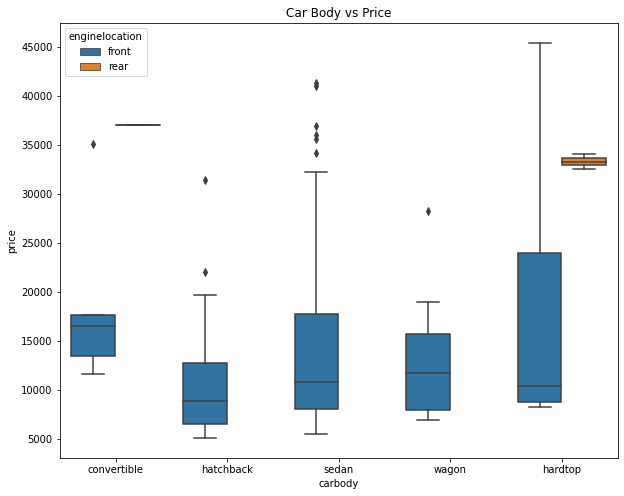

In [301]:
#Relationship between carbody vs price with hue enginelocation¶

plt.figure(figsize=(10, 8))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = cars)
plt.title('Car Body vs Price')
plt.show()

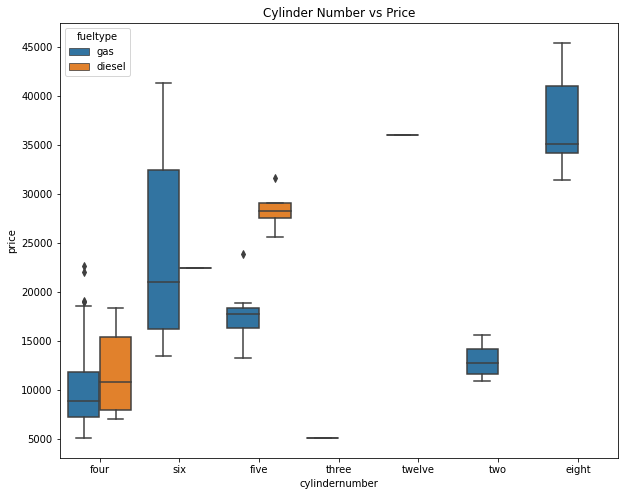

In [302]:
# Relationship between cylindernumber vs price with hue fueltype¶

plt.figure(figsize=(10, 8))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = cars)
plt.title('Cylinder Number vs Price')

plt.show()

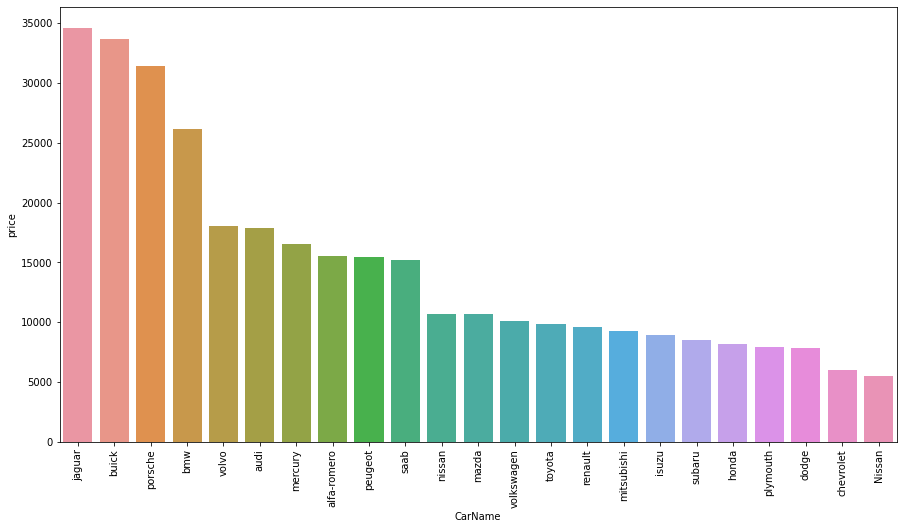

In [303]:
# Derived Metrics
# Average car price

avg_price=cars.groupby('CarName').price.mean().sort_values(ascending=False).reset_index()

sns.barplot(x='CarName',y='price',data=avg_price)
plt.xticks(rotation=90)
plt.show()

- Jaguar, Buick, Porsche, BMW are the most expensive cars

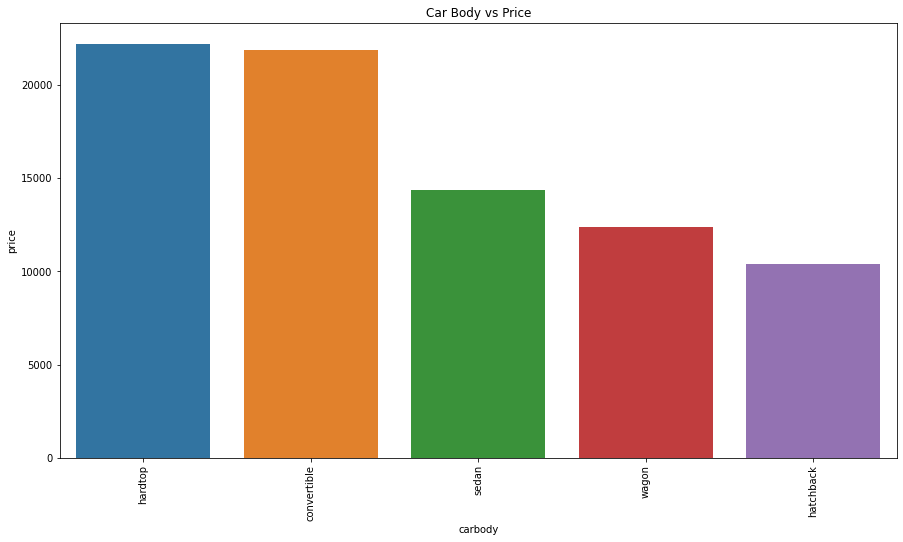

In [304]:
#carbody vs price

avg_price_carbody=cars.groupby('carbody').price.mean().sort_values(ascending=False).reset_index()
sns.barplot(x='carbody',y='price',data=avg_price_carbody)
plt.xticks(rotation=90)
plt.title('Car Body vs Price')
plt.show()

- hardtop and convertible are the most expensive cars

In [305]:
#Binning the Car Companies based on avg prices of each car Company.

cars['price'] = cars['price'].astype('int')
cars_temp = cars.copy()
t = cars_temp.groupby(['CarName'])['price'].mean()
cars_temp = cars_temp.merge(t.reset_index(), how='left',on='CarName')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
cars['Cars_Category'] = pd.cut(cars_temp['price_y'],bins,right=False,labels=label)
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium_Range
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium_Range
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium_Range
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium_Range
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium_Range


#### Significant variables after Visualization
- Cars_Category , Engine Type, Fuel Type
- Car Body , Aspiration , Cylinder Number
- Drivewheel , Curbweight , Car Length
- Car Length , Car width , Engine Size
- Boreratio , Horse Power , Wheel base
- citympg , highwaympg , symboling

In [306]:
significant_cols=['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']


In [307]:
cars=cars[significant_cols]
cars.head()

,price,Cars_Category,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,13495,Medium_Range,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1
1,16500,Medium_Range,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1
2,16500,Medium_Range,ohcv,gas,std,hatchback,six,rwd,94.5,2823,152,2.68,154,19,26,171.2,65.5
3,13950,Medium_Range,ohc,gas,std,sedan,four,fwd,99.8,2337,109,3.19,102,24,30,176.6,66.2
4,17450,Medium_Range,ohc,gas,std,sedan,five,4wd,99.4,2824,136,3.19,115,18,22,176.6,66.4


In [308]:
cars.shape

(205, 17)

### Step 4: Data Preparation

In [309]:
# Dummy Variables   
sig_cat_col = ['Cars_Category','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']
dummies=pd.get_dummies(cars[sig_cat_col],drop_first=True,dtype=int)
dummies.shape

(205, 22)

In [310]:
cars=pd.concat([cars,dummies],axis=1)
cars.head()

,price,Cars_Category,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495,Medium_Range,dohc,gas,std,convertible,four,rwd,88.6,2548,...,0,0,0,0,0,1,0,0,0,0
1,16500,Medium_Range,dohc,gas,std,convertible,four,rwd,88.6,2548,...,0,0,0,0,0,1,0,0,0,0
2,16500,Medium_Range,ohcv,gas,std,hatchback,six,rwd,94.5,2823,...,0,0,1,0,0,0,1,0,0,0
3,13950,Medium_Range,ohc,gas,std,sedan,four,fwd,99.8,2337,...,1,0,0,0,0,1,0,0,0,0
4,17450,Medium_Range,ohc,gas,std,sedan,five,4wd,99.4,2824,...,1,0,0,0,1,0,0,0,0,0


In [311]:
cars.shape

(205, 39)

In [312]:
cars.drop(sig_cat_col,axis=1,inplace=True)
cars.shape

(205, 32)

### Step 5: Splitting the Dataset in train and test set

In [313]:
np.random.seed(0)

df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,7609,93.7,2191,98,2.97,68,31,38,167.3,63.8,...,1,0,0,0,0,1,0,0,0,0
125,22018,94.5,2778,151,3.94,143,19,27,168.9,68.3,...,1,0,0,0,0,1,0,0,0,0
166,9538,94.5,2300,98,3.24,112,26,29,168.7,64.0,...,0,0,0,0,0,1,0,0,0,0
1,16500,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
199,18950,104.3,3157,130,3.62,162,17,22,188.8,67.2,...,1,0,0,0,0,1,0,0,0,0


In [314]:
print(df_train.shape)
print(df_test.shape)

(143, 32)
(62, 32)


### Rescaling the Features¶
For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. There are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [315]:
#Rescaling the features 

scaler=StandardScaler()


In [316]:
sig_num_cols=['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']

In [317]:
df_train[sig_num_cols]=scaler.fit_transform(df_train[sig_num_cols])

In [318]:
df_train['price']

122   -0.700200
125    1.151931
166   -0.452246
1      0.442648
199    0.757571
         ...   
87    -0.485538
103    0.056900
67     1.606191
24    -0.877585
8      1.390630
Name: price, Length: 143, dtype: float64

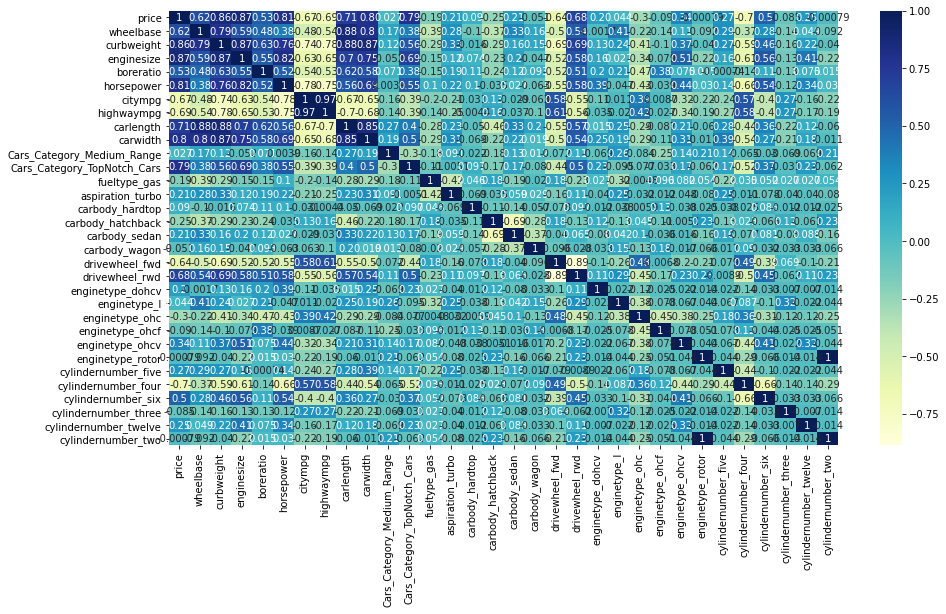

In [319]:
# plotting the heatmap for the features

sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [320]:
correlation=df_train.corrwith(df_train['price']).sort_values(ascending=False).reset_index()*100
print(correlation)

                                                index           0
0   pricepricepricepricepricepricepricepricepricep...  100.000000
1   enginesizeenginesizeenginesizeenginesizeengine...   86.791524
2   curbweightcurbweightcurbweightcurbweightcurbwe...   86.186058
3   horsepowerhorsepowerhorsepowerhorsepowerhorsep...   80.618195
4   carwidthcarwidthcarwidthcarwidthcarwidthcarwid...   79.938013
5   Cars_Category_TopNotch_CarsCars_Category_TopNo...   79.207715
6   carlengthcarlengthcarlengthcarlengthcarlengthc...   71.375024
7   drivewheel_rwddrivewheel_rwddrivewheel_rwddriv...   67.716981
8   wheelbasewheelbasewheelbasewheelbasewheelbasew...   62.259163
9   boreratioboreratioboreratioboreratioboreratiob...   53.359148
10  cylindernumber_sixcylindernumber_sixcylindernu...   50.061413
11  enginetype_ohcvenginetype_ohcvenginetype_ohcve...   33.946874
12  cylindernumber_fivecylindernumber_fivecylinder...   27.142988
13  cylindernumber_twelvecylindernumber_twelvecyli...   24.748935
14  aspira

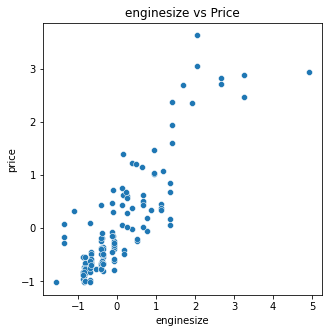

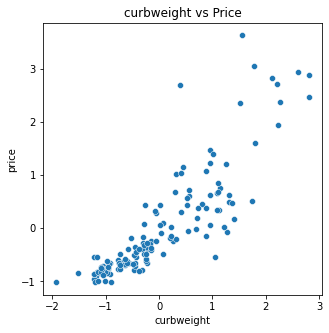

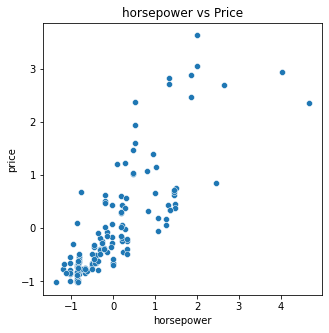

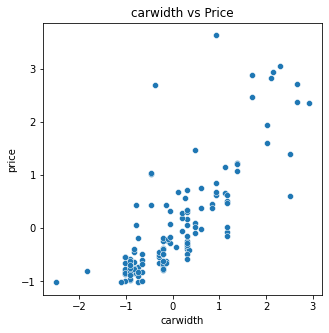

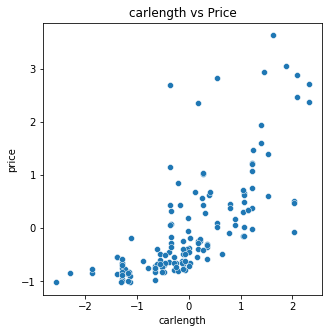

In [321]:
col=['enginesize','curbweight','horsepower','carwidth','carlength']

# Scatter Plot of independent variables vs dependent variables

for x in col:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=x,y='price',data=df_train)
    plt.title(x + ' vs Price')
    plt.show()

In [322]:
y_train=df_train.pop('price')
X_train=df_train

### Step 6: Building a Linear Model

In [323]:
### Step 6: Building a linear model
X_train_1=X_train['horsepower']
X_train_1=sm.add_constant(X_train_1)

lr_1=sm.OLS(y_train,X_train_1).fit()
lr_1.params

const         6.245005e-17
horsepower    8.061819e-01
dtype: float64

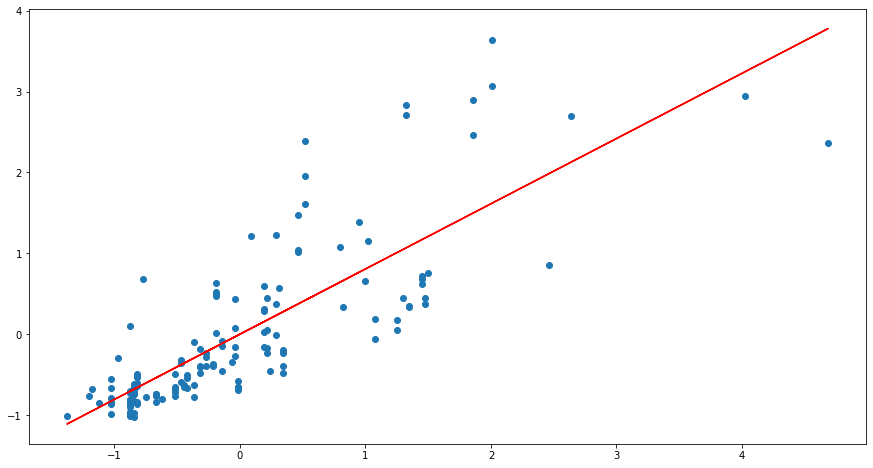

In [324]:
plt.scatter(X_train_1.iloc[:, 1], y_train)
plt.plot(X_train_1.iloc[:, 1], 0.8062*X_train_1.iloc[:, 1], 'r')
plt.show()

In [325]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           6.05e-34
Time:                        21:26:01   Log-Likelihood:                -127.86
No. Observations:                 143   AIC:                             259.7
Df Residuals:                     141   BIC:                             265.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.245e-17      0.050   1.25e-15      1.0

In [326]:
correlation=df_train.corrwith(y_train).sort_values(ascending=False).reset_index()*100
correlation

,index,0
0,enginesizeenginesizeenginesizeenginesizeengine...,86.791524
1,curbweightcurbweightcurbweightcurbweightcurbwe...,86.186058
2,horsepowerhorsepowerhorsepowerhorsepowerhorsep...,80.618195
3,carwidthcarwidthcarwidthcarwidthcarwidthcarwid...,79.938013
4,Cars_Category_TopNotch_CarsCars_Category_TopNo...,79.207715
5,carlengthcarlengthcarlengthcarlengthcarlengthc...,71.375024
6,drivewheel_rwddrivewheel_rwddrivewheel_rwddriv...,67.716981
7,wheelbasewheelbasewheelbasewheelbasewheelbasew...,62.259163
8,boreratioboreratioboreratioboreratioboreratiob...,53.359148
9,cylindernumber_sixcylindernumber_sixcylindernu...,50.061413


In [327]:
# adding another variable
X_train_1=X_train[['horsepower','curbweight','carwidth','Cars_Category_TopNotch_Cars','carlength','drivewheel_rwd']]

X_train_1=sm.add_constant(X_train_1)

lr_1=sm.OLS(y_train,X_train_1).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.2
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.83e-69
Time:                        21:26:01   Log-Likelihood:                -28.488
No. Observations:                 143   AIC:                             70.98
Df Residuals:                     136   BIC:                             91.71
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.1985      0.037     -5.345      0.000      -0.272      -0.125
horsepower                      0.2225      0.043      5.169      0.000       0.137       0.308
curbweight                      0.2533      0.083      3.067      0.003       0.090       0.417
carwidth                        0.1785      0.057      3.106      0.002       0.065       0.292
Cars_Category_TopNotch_Cars     1.2256      0.100     12.198      0.000       1.027       1.424
carlength                       0.0133      0.063      0.212      0.832      -0.111       0.137
drivewheel_rwd                  0.1511      0.076      1.987      0.049       0.001       0.301
==============================================================================
Omnibus:                       43.497   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.720
Skew:                           1.182   Prob(JB):                     1.01e-26
Kurtosis:                       6.808   Cond. No.                         7.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [328]:
#taking help of RFE now

lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(estimator=lm,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [329]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('wheelbase', False, 5),
 ('curbweight', True, 1),
 ('enginesize', False, 11),
 ('boreratio', False, 8),
 ('horsepower', True, 1),
 ('citympg', False, 17),
 ('highwaympg', False, 4),
 ('carlength', False, 12),
 ('carwidth', True, 1),
 ('Cars_Category_Medium_Range', False, 3),
 ('Cars_Category_TopNotch_Cars', True, 1),
 ('fueltype_gas', False, 9),
 ('aspiration_turbo', False, 15),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 6),
 ('drivewheel_rwd', False, 10),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 13),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 2),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', False, 14),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', False, 7),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 16)]

In [330]:
supporting_features=X_train.columns[rfe.support_]
supporting_features

Index(['curbweight', 'horsepower', 'carwidth', 'Cars_Category_TopNotch_Cars',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve'],
      dtype='object')

In [331]:
X_train_rfe=X_train[supporting_features]

In [332]:
X_train_rfe=X_train[supporting_features]

X_train_1=sm.add_constant(X_train_rfe)

lr_1=sm.OLS(y_train,X_train_1).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.2
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           3.41e-68
Time:                        21:26:01   Log-Likelihood:                -6.1473
No. Observations:                 143   AIC:                             44.29
Df Residuals:                     127   BIC:                             91.70
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.7074      0.176      4.025      0.000       0.360       1.055
curbweight                      0.2470      0.068      3.651      0.000       0.113       0.381
horsepower                      0.2510      0.053      4.717      0.000       0.146       0.356
carwidth                        0.2270      0.056      4.018      0.000       0.115       0.339
Cars_Category_TopNotch_Cars     1.0610      0.100     10.646      0.000       0.864       1.258
carbody_hardtop                -0.2211      0.214     -1.035      0.303      -0.644       0.202
carbody_hatchback              -0.6016      0.150     -4.014      0.000      -0.898      -0.305
carbody_sedan                  -0.4691      0.150     -3.135      0.002      -0.765      -0.173
carbody_wagon                  -0.5865      0.156     -3.759      0.000      -0.895      -0.278
enginetype_dohcv               -1.0254      0.365     -2.812      0.006      -1.747      -0.304
enginetype_ohc                  0.1260      0.067      1.893      0.061      -0.006       0.258
enginetype_ohcv                -0.1968      0.121     -1.631      0.105      -0.436       0.042
cylindernumber_five            -0.3815      0.165     -2.315      0.022      -0.708      -0.055
cylindernumber_four            -0.4642      0.127     -3.648      0.000      -0.716      -0.212
cylindernumber_six             -0.1381      0.139     -0.993      0.322      -0.413       0.137
cylindernumber_twelve          -0.2960      0.345     -0.857      0.393      -0.979       0.387
==============================================================================
Omnibus:                       41.730   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.871
Skew:                           1.101   Prob(JB):                     2.08e-27
Kurtosis:                       6.972   Cond. No.                         32.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

In [333]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cylindernumber_four,15.92
6,carbody_sedan,9.73
0,curbweight,9.06
2,carwidth,6.24
5,carbody_hatchback,6.15
9,enginetype_ohc,5.97
1,horsepower,5.61
13,cylindernumber_six,4.73
7,carbody_wagon,3.48
11,cylindernumber_five,2.82


Dropping cylindernumber_twelve beacuse its p-value is 0.393 and we want p-value less than 0.05 and hence rebuilding the model

In [334]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe1 = X_train_rfe.drop('cylindernumber_twelve',axis=1)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     133.3
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           4.16e-69
Time:                        21:26:02   Log-Likelihood:                -6.5600
No. Observations:                 143   AIC:                             43.12
Df Residuals:                     128   BIC:                             87.56
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [335]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cylindernumber_four,15.27
0,curbweight,9.06
6,carbody_sedan,9.05
2,carwidth,6.15
5,carbody_hatchback,5.95
9,enginetype_ohc,5.92
1,horsepower,4.69
13,cylindernumber_six,3.70
7,carbody_wagon,3.31
11,cylindernumber_five,2.66


In [336]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe2 = X_train_rfe1.drop('cylindernumber_six',axis=1)

# Adding a constant variable and Build a third fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.1
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           4.29e-70
Time:                        21:26:02   Log-Likelihood:                -6.8230
No. Observations:                 143   AIC:                             41.65
Df Residuals:                     129   BIC:                             83.13
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [337]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cylindernumber_four,8.99
0,curbweight,8.53
2,carwidth,5.72
9,enginetype_ohc,5.65
6,carbody_sedan,5.24
1,horsepower,4.53
5,carbody_hatchback,3.76
7,carbody_wagon,2.36
3,Cars_Category_TopNotch_Cars,2.13
11,cylindernumber_five,1.97


In [338]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe3 = X_train_rfe2.drop('carbody_hardtop',axis=1)

# Adding a constant variable and Build a fourth fitted model
X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     155.5
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           6.73e-71
Time:                        21:26:02   Log-Likelihood:                -7.5979
No. Observations:                 143   AIC:                             41.20
Df Residuals:                     130   BIC:                             79.71
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [339]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.51
11,cylindernumber_four,8.09
2,carwidth,5.65
8,enginetype_ohc,5.60
5,carbody_sedan,4.64
1,horsepower,4.17
4,carbody_hatchback,3.31
6,carbody_wagon,2.22
3,Cars_Category_TopNotch_Cars,2.08
10,cylindernumber_five,1.93


In [340]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe4 = X_train_rfe3.drop('enginetype_ohc',axis=1)

# Adding a constant variable and Build a fifth fitted model
X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     167.4
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.81e-71
Time:                        21:26:02   Log-Likelihood:                -9.0049
No. Observations:                 143   AIC:                             42.01
Df Residuals:                     131   BIC:                             77.56
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [341]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.25
10,cylindernumber_four,6.80
2,carwidth,5.65
5,carbody_sedan,4.33
1,horsepower,4.17
4,carbody_hatchback,3.10
6,carbody_wagon,2.20
3,Cars_Category_TopNotch_Cars,1.83
9,cylindernumber_five,1.63
7,enginetype_dohcv,1.57


In [342]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe5 = X_train_rfe4.drop('cylindernumber_five', axis=1)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     181.6
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           4.91e-72
Time:                        21:26:02   Log-Likelihood:                -10.457
No. Observations:                 143   AIC:                             42.91
Df Residuals:                     132   BIC:                             75.51
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [343]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.10
9,cylindernumber_four,5.76
2,carwidth,5.08
1,horsepower,4.13
5,carbody_sedan,3.52
4,carbody_hatchback,2.63
6,carbody_wagon,1.94
3,Cars_Category_TopNotch_Cars,1.83
7,enginetype_dohcv,1.54
8,enginetype_ohcv,1.43


In [344]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe6 = X_train_rfe5.drop('enginetype_ohcv',axis=1)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe6c = sm.add_constant(X_train_rfe6)
lm_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

#Summary of linear model
print(lm_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     200.3
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           8.26e-73
Time:                        21:26:02   Log-Likelihood:                -11.434
No. Observations:                 143   AIC:                             42.87
Df Residuals:                     133   BIC:                             72.50
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [345]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.10
8,cylindernumber_four,5.66
2,carwidth,5.08
1,horsepower,3.81
5,carbody_sedan,3.35
4,carbody_hatchback,2.47
6,carbody_wagon,1.89
3,Cars_Category_TopNotch_Cars,1.81
7,enginetype_dohcv,1.49


In [346]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe7 = X_train_rfe6.drop('curbweight',axis= 1)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe7c = sm.add_constant(X_train_rfe7)
lm_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()

#Summary of linear model
print(lm_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           4.86e-71
Time:                        21:26:03   Log-Likelihood:                -18.737
No. Observations:                 143   AIC:                             55.47
Df Residuals:                     134   BIC:                             82.14
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [347]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,cylindernumber_four,5.66
4,carbody_sedan,3.35
0,horsepower,2.72
3,carbody_hatchback,2.40
1,carwidth,2.22
2,Cars_Category_TopNotch_Cars,1.73
5,carbody_wagon,1.71
6,enginetype_dohcv,1.24


In [348]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe8 = X_train_rfe7.drop('cylindernumber_four',axis=1)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe8c = sm.add_constant(X_train_rfe8)
lm_rfe8 = sm.OLS(y_train, X_train_rfe8c).fit()

#Summary of linear model
print(lm_rfe8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           4.70e-70
Time:                        21:26:03   Log-Likelihood:                -24.089
No. Observations:                 143   AIC:                             64.18
Df Residuals:                     135   BIC:                             87.88
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [349]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.45
1,carwidth,2.12
2,Cars_Category_TopNotch_Cars,1.70
4,carbody_sedan,1.22
6,enginetype_dohcv,1.22
3,carbody_hatchback,1.10
5,carbody_wagon,1.02


We have to explain the maximum varianc with minimum number of variables, so we'll just see if we can drop carbody_sedan to check if there's any significant fall in R_squared value.

In [350]:

# Dropping highly correlated variables and insignificant variables

X_train_rfe9 = X_train_rfe8.drop('carbody_sedan',axis=1)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe9c = sm.add_constant(X_train_rfe9)
lm_rfe9 = sm.OLS(y_train, X_train_rfe9c).fit()

#Summary of linear model
print(lm_rfe9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.68e-69
Time:                        21:26:03   Log-Likelihood:                -28.398
No. Observations:                 143   AIC:                             70.80
Df Residuals:                     136   BIC:                             91.54
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

r2_score  dropped by 0.005, So we can proceed with dropping carbody_sedan variable.

In [351]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe9.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe9.values, i) for i in range(X_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.31
1,carwidth,2.08
2,Cars_Category_TopNotch_Cars,1.46
5,enginetype_dohcv,1.22
3,carbody_hatchback,1.10
4,carbody_wagon,1.02


Dropping the carbody_wagon as it has high p value of 0.315

In [352]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe10 = X_train_rfe9.drop('carbody_wagon',axis=1)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe10c = sm.add_constant(X_train_rfe10)
lm_rfe10 = sm.OLS(y_train, X_train_rfe10c).fit()

#Summary of linear model
print(lm_rfe10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.57e-70
Time:                        21:26:03   Log-Likelihood:                -28.930
No. Observations:                 143   AIC:                             69.86
Df Residuals:                     137   BIC:                             87.64
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [353]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe10.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe10.values, i) for i in range(X_train_rfe10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.28
1,carwidth,2.07
2,Cars_Category_TopNotch_Cars,1.45
4,enginetype_dohcv,1.22
3,carbody_hatchback,1.10


### Step 7 : Residual Analysis of the train data

In [354]:
y_train_price=lm_rfe10.predict(X_train_rfe10c)

/Users/rohitbele/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


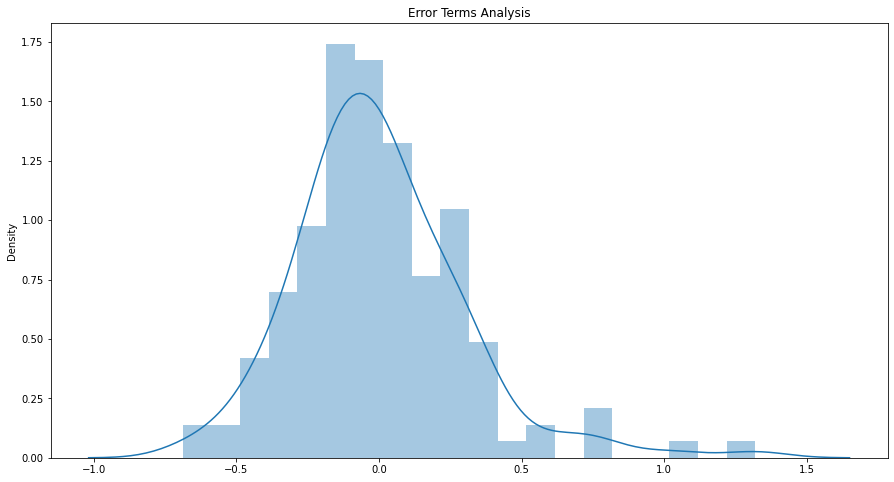

In [355]:
sns.distplot((y_train-y_train_price),bins=20)
plt.title('Error Terms Analysis')
plt.show()

### Step 8 : Making Predictions Using the Final Model

In [356]:
df_test[sig_num_cols]=scaler.transform(df_test[sig_num_cols])
df_test.head()


,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
160,-0.683618,-0.475189,-0.820850,-0.660242,-0.451443,-0.822372,1.887918,2.320526,-0.566894,-0.652569,...,1,0,0,0,0,1,0,0,0,0
186,-0.586314,-0.205872,-0.487359,-0.390836,-0.451443,-0.443427,0.240833,0.449816,-0.136752,-0.154030,...,1,0,0,0,0,1,0,0,0,0
59,-0.541325,0.046613,-0.284685,-0.072447,0.317543,-0.468690,0.091098,0.162014,0.349149,0.299187,...,1,0,0,0,0,1,0,0,0,0
165,-0.483096,-0.677177,-0.505784,-0.660242,-0.259197,0.238673,0.091098,-0.269688,-0.375720,-0.833856,...,0,0,0,0,0,1,0,0,0,0
140,-0.700971,-0.879165,-0.551846,-0.415328,1.201877,-0.746583,0.091098,0.018113,-1.283797,-0.924500,...,0,1,0,0,0,1,0,0,0,0


In [357]:
df_test.shape

(62, 32)

In [358]:
y_test=df_test.pop('price')
X_test=df_train

In [359]:
X_test_sm=sm.add_constant(X_test)
X_test_new=X_test_sm[X_train_rfe10c.columns]

In [360]:
y_pred=lm_rfe10.predict(X_test_new)
y_pred

122   -0.740936
125    1.838999
166   -0.439129
1     -0.277034
199    0.693663
         ...   
87    -0.029240
103    0.489209
67     2.107560
24    -0.897428
8      1.123397
Length: 143, dtype: float64

/Users/rohitbele/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


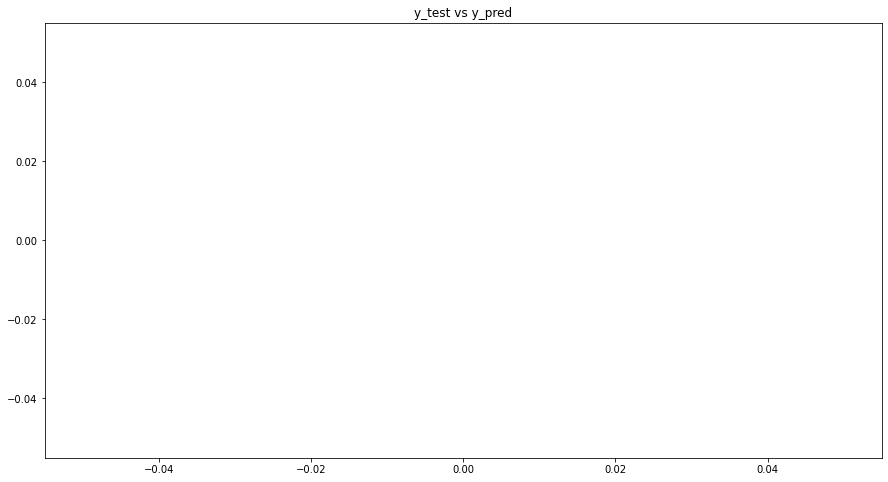

In [363]:
# plotting y_test and y_pred to understand the spread

sns.scatterplot(y_test,y_pred)
plt.title('y_test vs y_pred')
plt.show()